# Import all libraries


In [1]:
!pip install imutils


In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import tensorflow as tf
from imutils import paths

# Create the necessary constant variables

In [3]:
path = list(paths.list_images("../input/cat-and-dog/training_set/training_set"))
y_data = ['cats','dogs']

# Data Preprocessing

In [4]:
type(path)

list

In [5]:
len(path)

8005

In [6]:
path[1]

'../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg'

In [7]:
path[1].split("/")

['..',
 'input',
 'cat-and-dog',
 'training_set',
 'training_set',
 'dogs',
 'dog.1942.jpg']

In [8]:
 path[1].split("/")[-2]

'dogs'

In [9]:
X_data = []
Y_labels = []

for i in range(0,len(path)): 
    label = path[i].split("/")[-2]
    if label not in y_data:
        continue 
    else:
        image = cv2.imread(path[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (124,124))
        X_data.append(image)
        Y_labels.append(label)

In [10]:
pd.Series(Y_labels).value_counts()

dogs    4005
cats    4000
dtype: int64

In [11]:
X_data[0]

array([[[237, 230, 222],
        [237, 230, 222],
        [237, 230, 222],
        ...,
        [226, 222, 211],
        [222, 218, 208],
        [223, 219, 208]],

       [[238, 231, 223],
        [238, 231, 223],
        [238, 231, 223],
        ...,
        [230, 226, 214],
        [230, 226, 215],
        [225, 221, 210]],

       [[239, 232, 224],
        [239, 232, 224],
        [239, 232, 224],
        ...,
        [233, 229, 218],
        [233, 230, 219],
        [229, 225, 214]],

       ...,

       [[192, 183, 167],
        [186, 177, 160],
        [187, 178, 162],
        ...,
        [186, 181, 159],
        [185, 179, 157],
        [186, 181, 159]],

       [[191, 182, 165],
        [185, 176, 159],
        [186, 177, 161],
        ...,
        [184, 179, 156],
        [183, 178, 154],
        [184, 179, 156]],

       [[190, 182, 163],
        [184, 176, 158],
        [186, 177, 159],
        ...,
        [182, 178, 153],
        [181, 177, 153],
        [183, 179, 154]]

In [12]:
x_array = np.array(X_data)
y_array = np.array(Y_labels)

In [13]:
x_array.shape

(8005, 124, 124, 3)

 # visualize  data 

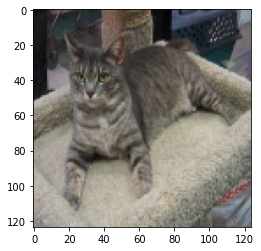

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_array[6000])

In [15]:
y_array.shape

(8005,)

# Encoding Target

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_array)
Y_Encoded = LE.transform(y_array)

In [17]:
y_array

array(['dogs', 'dogs', 'dogs', ..., 'cats', 'cats', 'cats'], dtype='<U4')

In [18]:
# dogs -> 1  
# cats -> 0  
Y_Encoded 

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
Y_Encoded.shape

(8005,)

# Spliting the data into Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, Y_Encoded, test_size = 0.3 , random_state=42)

In [21]:
np.min(x_train),  np.max(x_train)

(0, 255)

In [22]:
x_train_norm = x_train/255. 
x_test_norm = x_test/255.

In [23]:
np.min(x_train_norm),  np.max(x_train_norm)

(0.0, 1.0)

In [24]:
print (x_train_norm[0])

[[[0.36862745 0.34901961 0.3254902 ]
  [0.28627451 0.26666667 0.24313725]
  [0.16470588 0.14901961 0.11372549]
  ...
  [0.12941176 0.10196078 0.07058824]
  [0.2        0.16470588 0.14509804]
  [0.19215686 0.15294118 0.14509804]]

 [[0.41568627 0.39607843 0.37254902]
  [0.26666667 0.24705882 0.22352941]
  [0.21568627 0.2        0.16470588]
  ...
  [0.21960784 0.19215686 0.16078431]
  [0.19215686 0.15686275 0.1372549 ]
  [0.15686275 0.11372549 0.09803922]]

 [[0.35294118 0.33333333 0.30980392]
  [0.27843137 0.2627451  0.22745098]
  [0.22745098 0.21176471 0.17647059]
  ...
  [0.11764706 0.09019608 0.05882353]
  [0.1372549  0.09803922 0.07058824]
  [0.1372549  0.08627451 0.0627451 ]]

 ...

 [[0.76078431 0.74117647 0.72941176]
  [0.78823529 0.76862745 0.75686275]
  [0.79607843 0.77647059 0.76470588]
  ...
  [0.53333333 0.56470588 0.64705882]
  [0.52156863 0.54509804 0.63921569]
  [0.55686275 0.57254902 0.67843137]]

 [[0.83529412 0.81568627 0.80392157]
  [0.84705882 0.82745098 0.81568627]


#  CNN model development for feature extration

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 122, 122, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (Non

In [30]:
model.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=30,batch_size=64 , verbose=1)

2022-12-27 20:07:58.590534: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1033820736 exceeds 10% of free system memory.
2022-12-27 20:07:59.810020: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1033820736 exceeds 10% of free system memory.
2022-12-27 20:08:00.688887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-27 20:08:02.712578: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


88/88 [==============================] - 15s 56ms/step - loss: 0.6953 - accuracy: 0.5004 - val_loss: 0.6895 - val_accuracy: 0.5774
Epoch 2/30
88/88 [==============================] - 3s 39ms/step - loss: 0.6902 - accuracy: 0.5244 - val_loss: 0.7094 - val_accuracy: 0.4929
Epoch 3/30
88/88 [==============================] - 3s 37ms/step - loss: 0.6765 - accuracy: 0.5693 - val_loss: 0.6519 - val_accuracy: 0.6049
Epoch 4/30
88/88 [==============================] - 3s 37ms/step - loss: 0.6432 - accuracy: 0.6177 - val_loss: 0.6323 - val_accuracy: 0.6415
Epoch 5/30
88/88 [==============================] - 3s 38ms/step - loss: 0.6292 - accuracy: 0.6379 - val_loss: 0.6504 - val_accuracy: 0.5924
Epoch 6/30
88/88 [==============================] - 3s 38ms/step - loss: 0.5897 - accuracy: 0.6773 - val_loss: 0.6017 - val_accuracy: 0.6815
Epoch 7/30
88/88 [==============================] - 3s 38ms/step - loss: 0.5583 - accuracy: 0.7134 - val_loss: 0.5468 - val_accuracy: 0.7290
Epoch 8/30
88/88 [=====

In [32]:
ModelLoss, ModelAccuracy = model.evaluate(x_test_norm, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

76/76 [==============================] - 1s 7ms/step - loss: 0.5748 - accuracy: 0.8260
Test Loss is 0.5747953057289124
Test Accuracy is 0.8259783387184143


[1.]


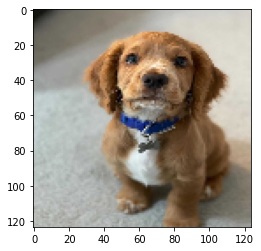

In [43]:
from skimage import io

img_path = '../input/predictionn/199541335_559416451712104_7197889103846206569_n.jpg'


img = io.imread(img_path)
x =cv2.resize(img,(124, 124))
imgplot = plt.imshow(x)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)[0]
#preds[0,0]
# dogs -> 1  
# cats -> 0  
if (preds == 1):
    print("Dog")
else :
    print("CAt")

CAt


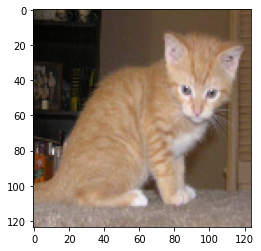

In [34]:
from skimage import io

img_path = '/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4003.jpg'


img = io.imread(img_path)
x =cv2.resize(img,(124, 124))
imgplot = plt.imshow(x)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)[0]
#preds[0,0]
# dogs -> 1  
# cats -> 0  
if (preds == 1):
    print("Dog")
else :
    print("CAt")